https://www.kaggle.com/fernandol/cracking-the-walmart-sales-forecasting-challenge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('F:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\stores.csv')
sales.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
features = pd.read_csv('F:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
train = pd.read_csv('F:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
test = pd.read_csv('F:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
data = features.merge(how='inner',on='Store',right=sales)
data = train.merge(on=['Store','Date'],right=data, how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [7]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_y     421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 52.3+ MB


In [8]:
# data.set_index('Date', inplace=True, drop=True)
# data.head()

In [9]:
data.drop(columns=['IsHoliday_y'], inplace=True)

In [10]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


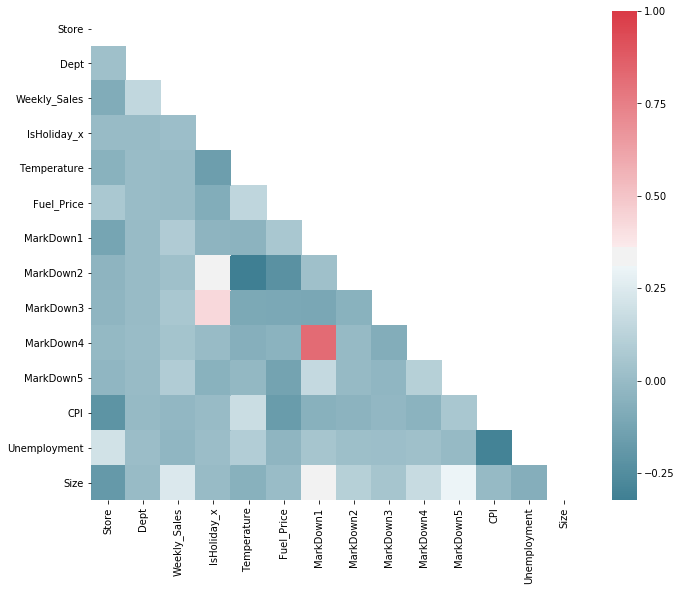

In [12]:
corr = data.corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap)
plt.show()

In [13]:
data.loc[data['Weekly_Sales'] >240000,"Date"].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2011-08-26     1
2010-02-05     1
Name: Date, dtype: int64

Dummy variable creation

In [17]:
from datetime import datetime
from datetime import timedelta

In [18]:
data['Month'] = data.Date.apply(lambda x: datetime.strftime(x,format="%B"))
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,February
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,February
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,March


In [19]:
data[data['IsHoliday_x'] == True]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
31,1,1,2010-09-10,18194.74,True,78.69,2.565,NaN,NaN,NaN,NaN,NaN,211.495190,7.787,A,151315,September
42,1,1,2010-11-26,18820.29,True,64.52,2.735,NaN,NaN,NaN,NaN,NaN,211.748433,7.838,A,151315,November
47,1,1,2010-12-31,19124.58,True,48.43,2.943,NaN,NaN,NaN,NaN,NaN,211.404932,7.838,A,151315,December
53,1,1,2011-02-11,37887.17,True,36.39,3.022,NaN,NaN,NaN,NaN,NaN,212.936705,7.742,A,151315,February
83,1,1,2011-09-09,17746.68,True,76.00,3.546,NaN,NaN,NaN,NaN,NaN,215.861056,7.962,A,151315,September
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,A,151315,November
99,1,1,2011-12-30,23350.88,True,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,A,151315,December
105,1,1,2012-02-10,36988.49,True,48.02,3.409,13925.06,6927.23,101.64,8471.88,6886.04,220.265178,7.348,A,151315,February
135,1,1,2012-09-07,18322.37,True,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,A,151315,September


In [20]:
data.iloc[np.where(data.Date == datetime(2010,2,12))]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
144,1,2,2010-02-12,44682.74,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
287,1,3,2010-02-12,10887.84,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
430,1,4,2010-02-12,35351.21,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
573,1,5,2010-02-12,29620.81,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
716,1,6,2010-02-12,9135.00,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
859,1,7,2010-02-12,18310.31,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
1002,1,8,2010-02-12,37334.83,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
1145,1,9,2010-02-12,16562.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February
1288,1,10,2010-02-12,31494.77,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,February


In [24]:
data['Super Bowl'] = np.where((data.Date == datetime(2010,2,12)) | (data.Date == datetime(2011,2,11)) | (data.Date == datetime(2012,2,10)) | (data.Date == datetime(2013,2,8)),'yes','no')
data['Labor Day'] = np.where((data.Date == datetime(2010,9,10)) | (data.Date == datetime(2011,9,9)) | (data.Date == datetime(2012,9,7)) | (data.Date == datetime(2013,9,6)),'yes','no')
data['Thanksgiving'] = np.where((data.Date == datetime(2010,11,26)) | (data.Date == datetime(2011,11,25)) | (data.Date == datetime(2012,11,23)) | (data.Date == datetime(2013,11,29)),'yes','no')
data['Christmas'] = np.where((data.Date == datetime(2010,12,31)) | (data.Date == datetime(2011,12,30)) | (data.Date == datetime(2012,12,28)) | (data.Date == datetime(2013,12,27)),'yes','no')

In [25]:
cat_vars = ['Store','Dept','Type','IsHoliday_x','Month','Super Bowl','Labor Day','Thanksgiving','Christmas']

In [26]:
def createDummyVariables(df,col):
    df_dummy = pd.get_dummies(data=df[col],drop_first=True,prefix=col)
    df = pd.concat([df,df_dummy],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [27]:
data_cat = data[cat_vars]
for feature in cat_vars:
    data_cat = createDummyVariables(data_cat,feature)
data_cat.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 142 columns):
Store_2             421570 non-null uint8
Store_3             421570 non-null uint8
Store_4             421570 non-null uint8
Store_5             421570 non-null uint8
Store_6             421570 non-null uint8
Store_7             421570 non-null uint8
Store_8             421570 non-null uint8
Store_9             421570 non-null uint8
Store_10            421570 non-null uint8
Store_11            421570 non-null uint8
Store_12            421570 non-null uint8
Store_13            421570 non-null uint8
Store_14            421570 non-null uint8
Store_15            421570 non-null uint8
Store_16            421570 non-null uint8
Store_17            421570 non-null uint8
Store_18            421570 non-null uint8
Store_19            421570 non-null uint8
Store_20            421570 non-null uint8
Store_21            421570 non-null uint8
Store_22            421570 non-null uint8
Store_

In [28]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Month,Super Bowl,Labor Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,February,no,no,no,no
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.242170,8.106,A,151315,February,yes,no,no,no
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,NaN,211.289143,8.106,A,151315,February,no,no,no,no
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,NaN,211.319643,8.106,A,151315,February,no,no,no,no
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,NaN,211.350143,8.106,A,151315,March,no,no,no,no


In [32]:
df = pd.concat([data[data.columns.difference(cat_vars)],data_cat],axis=1)
df.head()

,CPI,Date,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Super Bowl_yes,Labor Day_yes,Thanksgiving_yes,Christmas_yes
0,211.096358,2010-02-05,2.572,NaN,NaN,NaN,NaN,NaN,151315,42.31,...,0,0,0,0,0,0,0,0,0,0
1,211.242170,2010-02-12,2.548,NaN,NaN,NaN,NaN,NaN,151315,38.51,...,0,0,0,0,0,0,1,0,0,0
2,211.289143,2010-02-19,2.514,NaN,NaN,NaN,NaN,NaN,151315,39.93,...,0,0,0,0,0,0,0,0,0,0
3,211.319643,2010-02-26,2.561,NaN,NaN,NaN,NaN,NaN,151315,46.63,...,0,0,0,0,0,0,0,0,0,0
4,211.350143,2010-03-05,2.625,NaN,NaN,NaN,NaN,NaN,151315,46.50,...,0,1,0,0,0,0,0,0,0,0


In [33]:
df.info(max_cols=160)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 154 columns):
CPI                 421570 non-null float64
Date                421570 non-null datetime64[ns]
Fuel_Price          421570 non-null float64
MarkDown1           150681 non-null float64
MarkDown2           111248 non-null float64
MarkDown3           137091 non-null float64
MarkDown4           134967 non-null float64
MarkDown5           151432 non-null float64
Size                421570 non-null int64
Temperature         421570 non-null float64
Unemployment        421570 non-null float64
Weekly_Sales        421570 non-null float64
Store_2             421570 non-null uint8
Store_3             421570 non-null uint8
Store_4             421570 non-null uint8
Store_5             421570 non-null uint8
Store_6             421570 non-null uint8
Store_7             421570 non-null uint8
Store_8             421570 non-null uint8
Store_9             421570 non-null uint8
Store_10           

Missing values

In [34]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Month                0
Super Bowl           0
Labor Day            0
Thanksgiving         0
Christmas            0
dtype: int64